In [82]:
%%writefile "/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/order5/plots/bed/generate_bed.py"
import pandas as pd
geno_bed = pd.read_table('/public/home/lizw/data/IMPORTANT_genome/arabidopsis/tair10/all_chr.bed',names=['chrom','start','end'])
binsize=100000
for i in geno_bed.itertuples(index=False):
    chrom,start,end = i
    start_list = list(range(0,end,binsize))
    end_list = list(range(binsize,end+binsize,binsize))
    name_list = [f'{chrom}.{start_list[index]}-{end_list[index]}' for index in range(len(start_list))]
    beddf = pd.DataFrame({'chrom':[chrom]*(end//binsize+1),'start':list(range(0,end,binsize)),'end':list(range(binsize,end+binsize,binsize)),'names':name_list})
    beddf.to_csv(f'/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/order5/plots/bed/{chrom}.bed',header=None,index=None,sep="\t")
    for interval in beddf.itertuples(index=False):
        chrom_in,start_in,end_in,name_in = interval
        with open(f'/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/order5/plots/bed/{chrom_in}.{start_in}-{end_in}.bed','w+') as bedfile:
            bedfile.write(f'{chrom_in}\t{start_in}\t{end_in}\t{name_in}')
        with open('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/order5/plots/bed/bedlist.csv','a+') as bedlist:
            bedlist.write(f'{name_in}\n')

Overwriting /public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/order5/plots/bed/generate_bed.py


In [83]:
geno_bed

,chrom,start,end
0,1,0,30427671
1,2,0,19698289
2,3,0,23459830
3,4,0,18585056
4,5,0,26975502


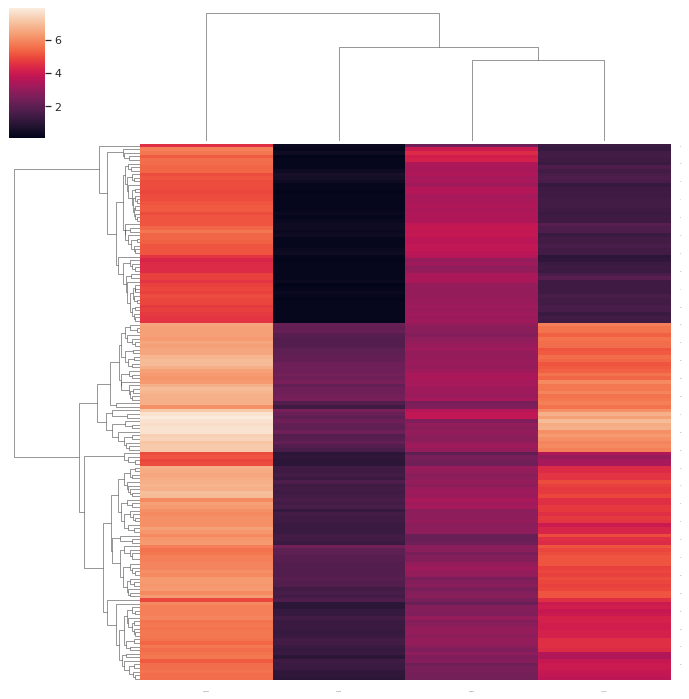

In [97]:
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)
g.ax_heatmap.tick_params(tick2On=False, labelsize=False)

In [86]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
